### 1. Import packages

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#set default setting of seaborn
sns.set()

### 2. Read the Data

In [3]:
#read the data
raw_data = pd.read_csv(r"C:\Users\Tarun\Desktop\DS\Machine Learning\Supervised Learning\Python\Ensemble technique\Breast Cancer Prediction\Dataset\cancer.csv")

#print the first 5 rows of the data
raw_data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


### 3. Understand and Prepare the Data

**Data Types and Dimensions**

In [4]:
#check the data types of the variables
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

Removing 'id' and 'Unnamed:32' feature from dataset

In [5]:
data = raw_data.drop(['id', 'Unnamed: 32'], axis=1)
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
#get the shape
print(data.shape)

(569, 31)


Number of Benign:  357
Number of Malignant:  212


C:\Users\Tarun\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


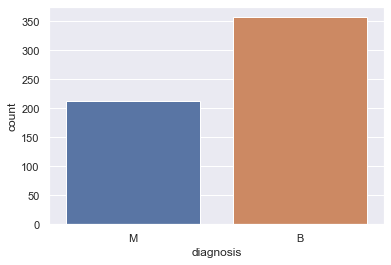

In [7]:
ax = sns.countplot(data['diagnosis'], label='Count')   #M = 212, B = 357
B, M = data['diagnosis'].value_counts()
print('Number of Benign: ', B)
print('Number of Malignant: ', M)

**Statistical Summary**

In [8]:
#data frame with numerical features
data.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [9]:
#data frame with categorical features
data.describe(include='object')

,diagnosis
count,569
unique,2
top,B
freq,357


**Label Encoding for Target Variable**

In [10]:
#replace 'M' with 0
data['diagnosis'] = data['diagnosis'].replace('M', 0)
#replace 'B' with 1
data['diagnosis'] = data['diagnosis'].replace('B', 1)

data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


**Missing Data Treatment**

In [11]:
#et the count of missing values
missing_values = data.isnull().sum()

#print the count of missing values
print(missing_values)

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


**Visualization**

PDF's of features

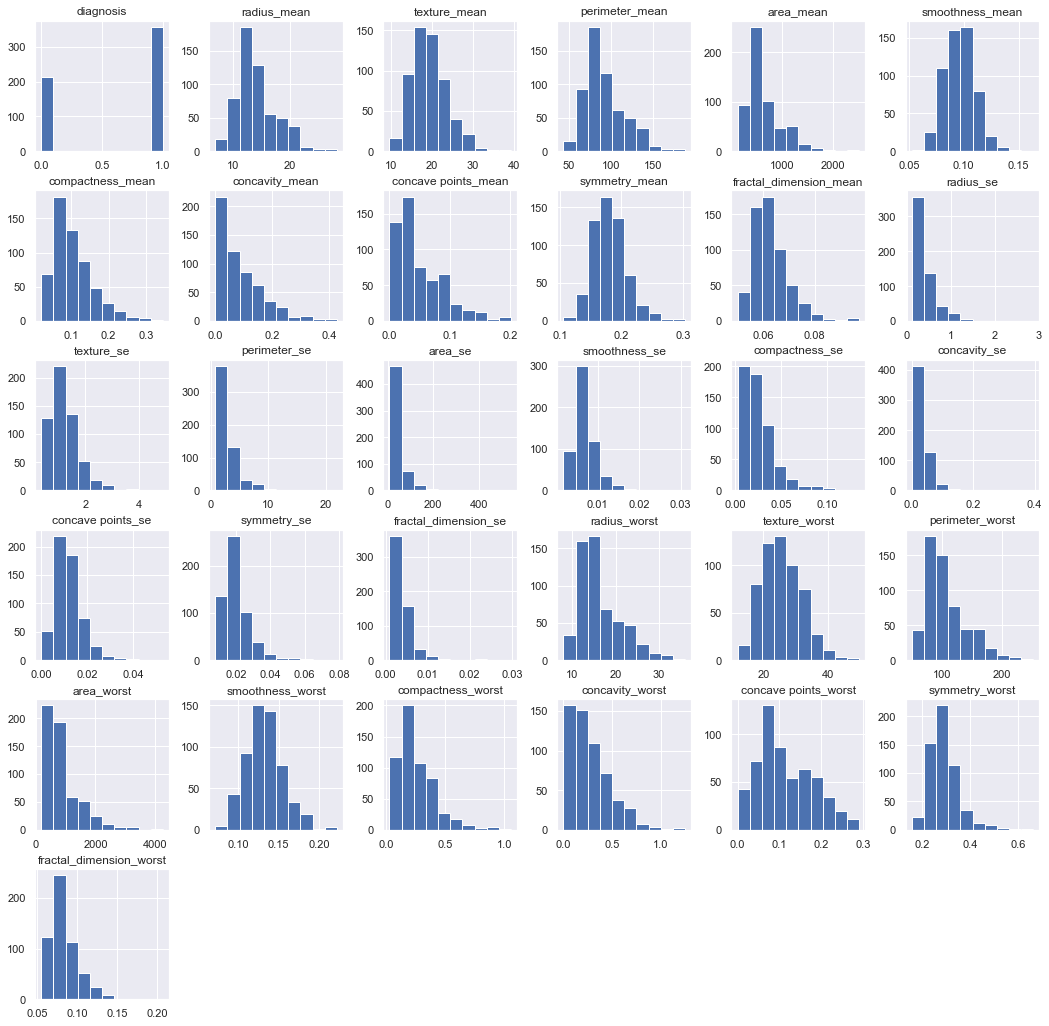

In [12]:
fig = data.hist(figsize=(18, 18))

C:\Users\Tarun\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


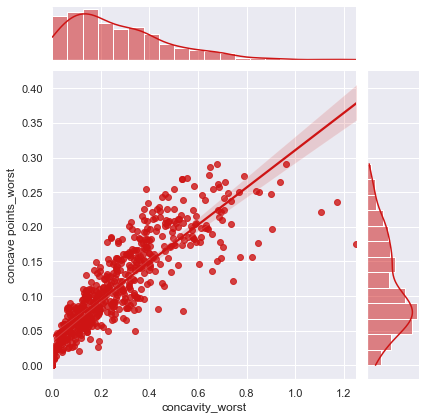

In [13]:
x = data.drop(['diagnosis'], axis=1)
sns.jointplot(x.loc[:, 'concavity_worst'], x.loc[:, 'concave points_worst'], kind='reg', color='#ce1414')

**Correlation**

In [14]:
data_num = data.drop('diagnosis',axis=1)
corr = data_num.corr()
corr

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
radius_mean,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
fractal_dimension_mean,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


<AxesSubplot:>

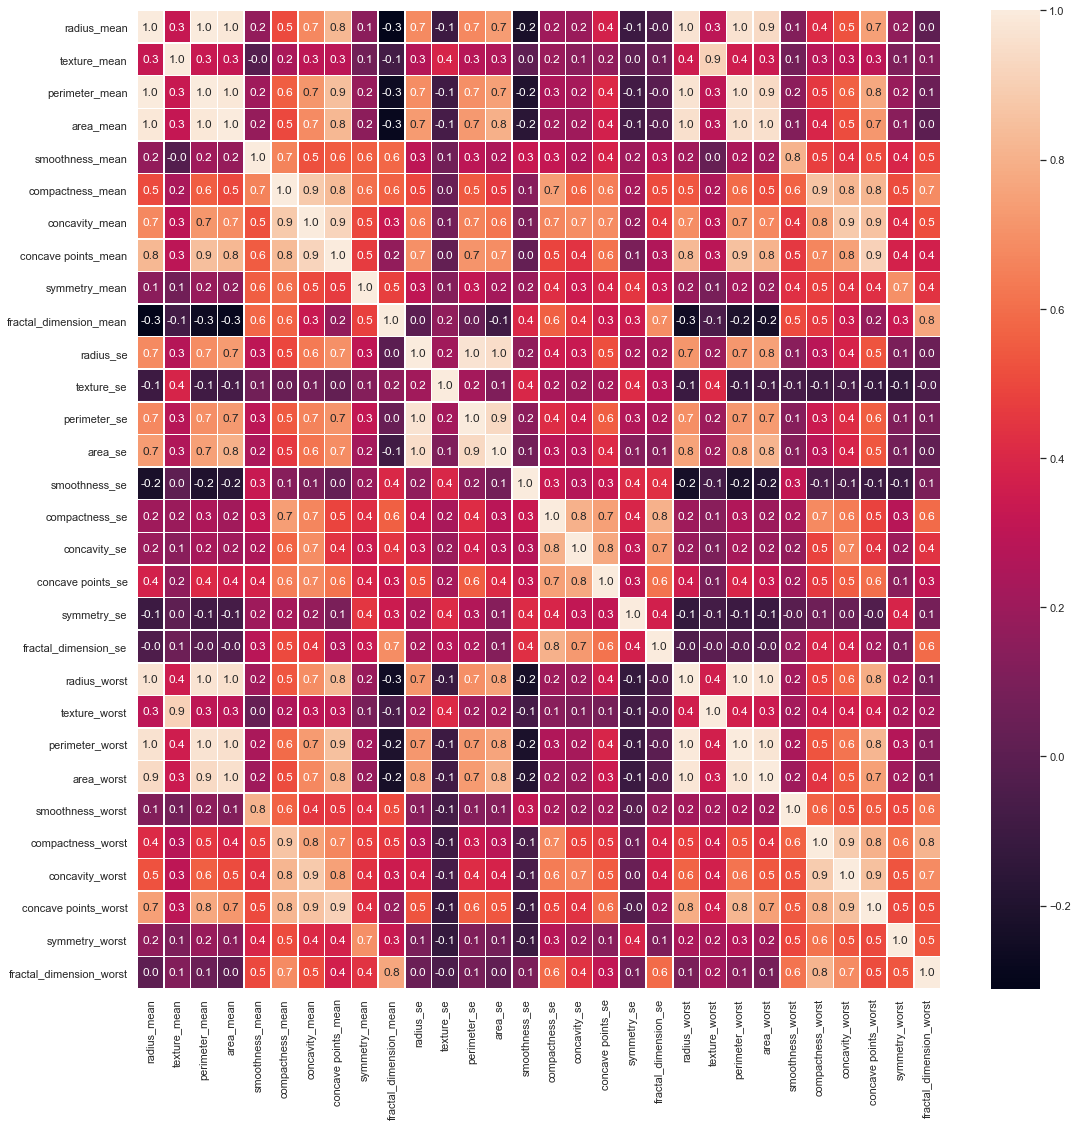

In [15]:
fig,ax = plt.subplots(figsize = (18,18))
sns.heatmap(data_num.corr(),annot=True,linewidths=0.5,fmt='.1f',ax=ax)

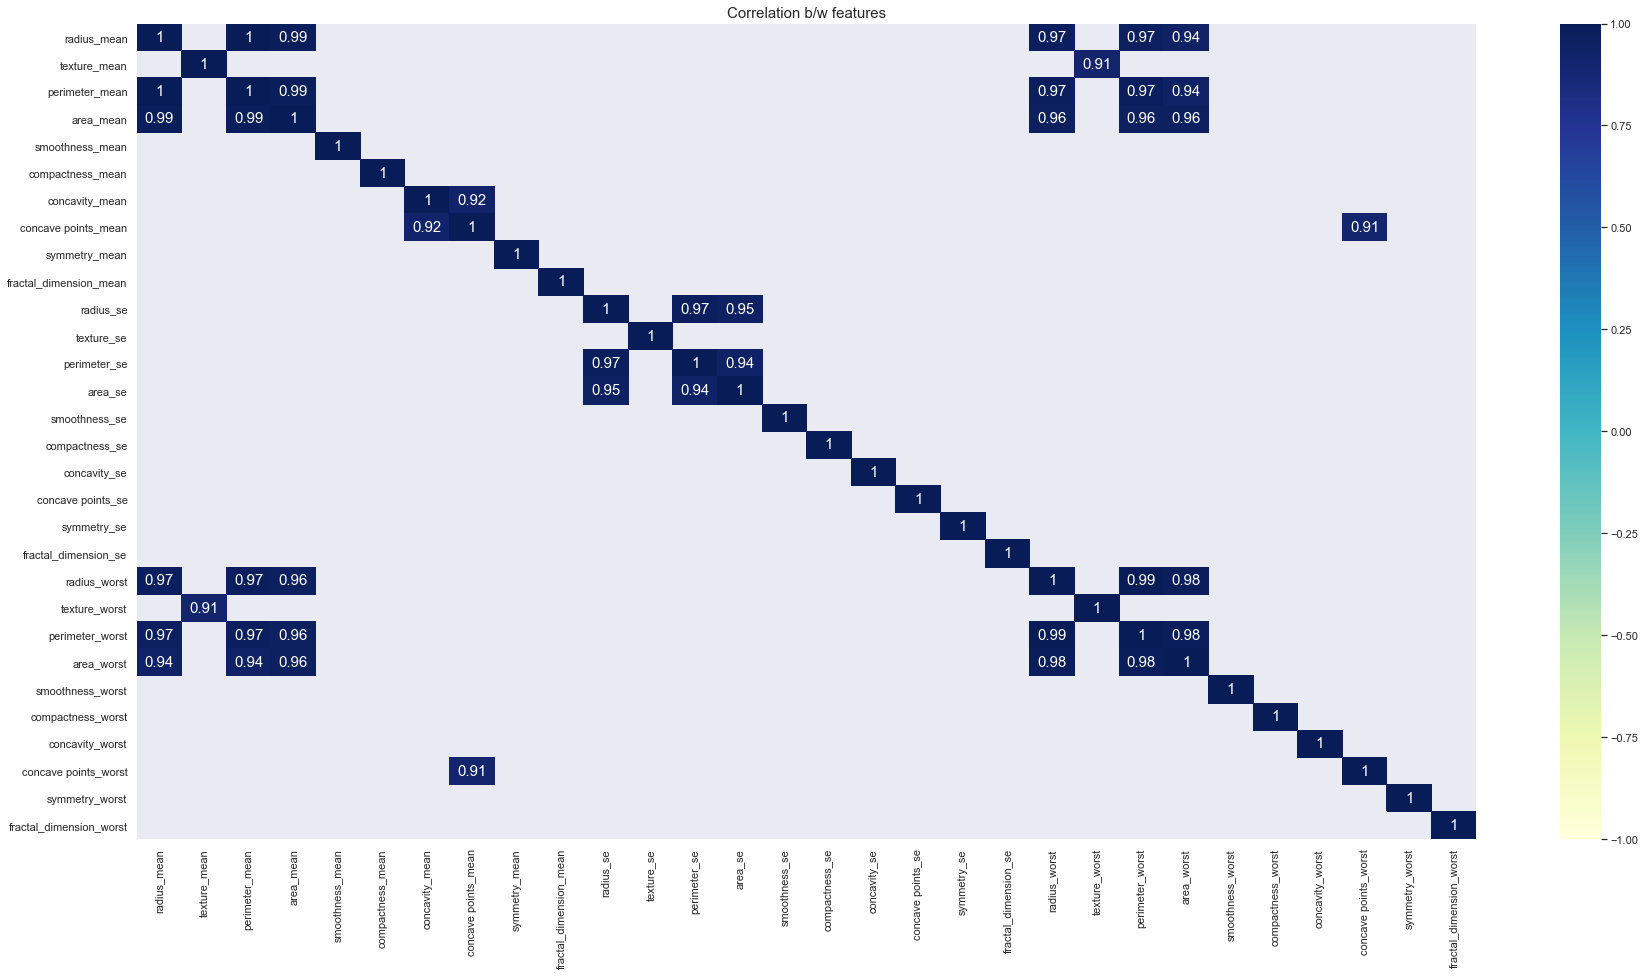

In [16]:
# plotting correlation plot

#set the figure size

plt.figure(figsize=(30,15))

# plotting the heat map
# corr: give the correlation matrix
# cmap: colour code used for plotting
# vmax: gives maximum range of values for the chart
# vmin: gives minimum range of values for the chart
# annot: prints the correlation values in the chart
# annot_kws: sets the font size of the annotation
# set condition to get a strong correlation between the variables

sns.heatmap(corr[(corr>=0.9)|(corr<=-0.9)],
           cmap='YlGnBu',vmax =1.0,vmin = -1.0,
           annot=True,annot_kws = {"size":15})

plt.title('Correlation b/w features',fontsize=15)
plt.show()

***By looking at the correlation matrix we can see that variables 'perimeter_mean','radius_mean','compactness_mean','concave points_mean','radius_se','perimeter_se','radius_worst','perimeter_worst','compactness_worst','concave points_worst','compactness_se','concave points_se','texture_worst','area_worst' have a strong positive correlation with each other. These feature pairs are strongly correlated to each other. Ideally, we should not select these features together for training the model.***


In [17]:
drop_list = ['perimeter_mean','radius_mean','compactness_mean','concave points_mean','radius_se','perimeter_se','radius_worst','perimeter_worst','compactness_worst','concave points_worst','compactness_se','concave points_se','texture_worst','area_worst']
data_cleaned = data.drop(drop_list,axis=1)
data_cleaned.head()

,diagnosis,texture_mean,area_mean,smoothness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,texture_se,area_se,smoothness_se,concavity_se,symmetry_se,fractal_dimension_se,smoothness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
0,0,10.38,1001.0,0.11840,0.3001,0.2419,0.07871,0.9053,153.40,0.006399,0.05373,0.03003,0.006193,0.1622,0.7119,0.4601,0.11890
1,0,17.77,1326.0,0.08474,0.0869,0.1812,0.05667,0.7339,74.08,0.005225,0.01860,0.01389,0.003532,0.1238,0.2416,0.2750,0.08902
2,0,21.25,1203.0,0.10960,0.1974,0.2069,0.05999,0.7869,94.03,0.006150,0.03832,0.02250,0.004571,0.1444,0.4504,0.3613,0.08758
3,0,20.38,386.1,0.14250,0.2414,0.2597,0.09744,1.1560,27.23,0.009110,0.05661,0.05963,0.009208,0.2098,0.6869,0.6638,0.17300
4,0,14.34,1297.0,0.10030,0.1980,0.1809,0.05883,0.7813,94.44,0.011490,0.05688,0.01756,0.005115,0.1374,0.4000,0.2364,0.07678


In [18]:
data_cleaned.columns

Index(['diagnosis', 'texture_mean', 'area_mean', 'smoothness_mean',
       'concavity_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'texture_se', 'area_se', 'smoothness_se', 'concavity_se', 'symmetry_se',
       'fractal_dimension_se', 'smoothness_worst', 'concavity_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

<AxesSubplot:>

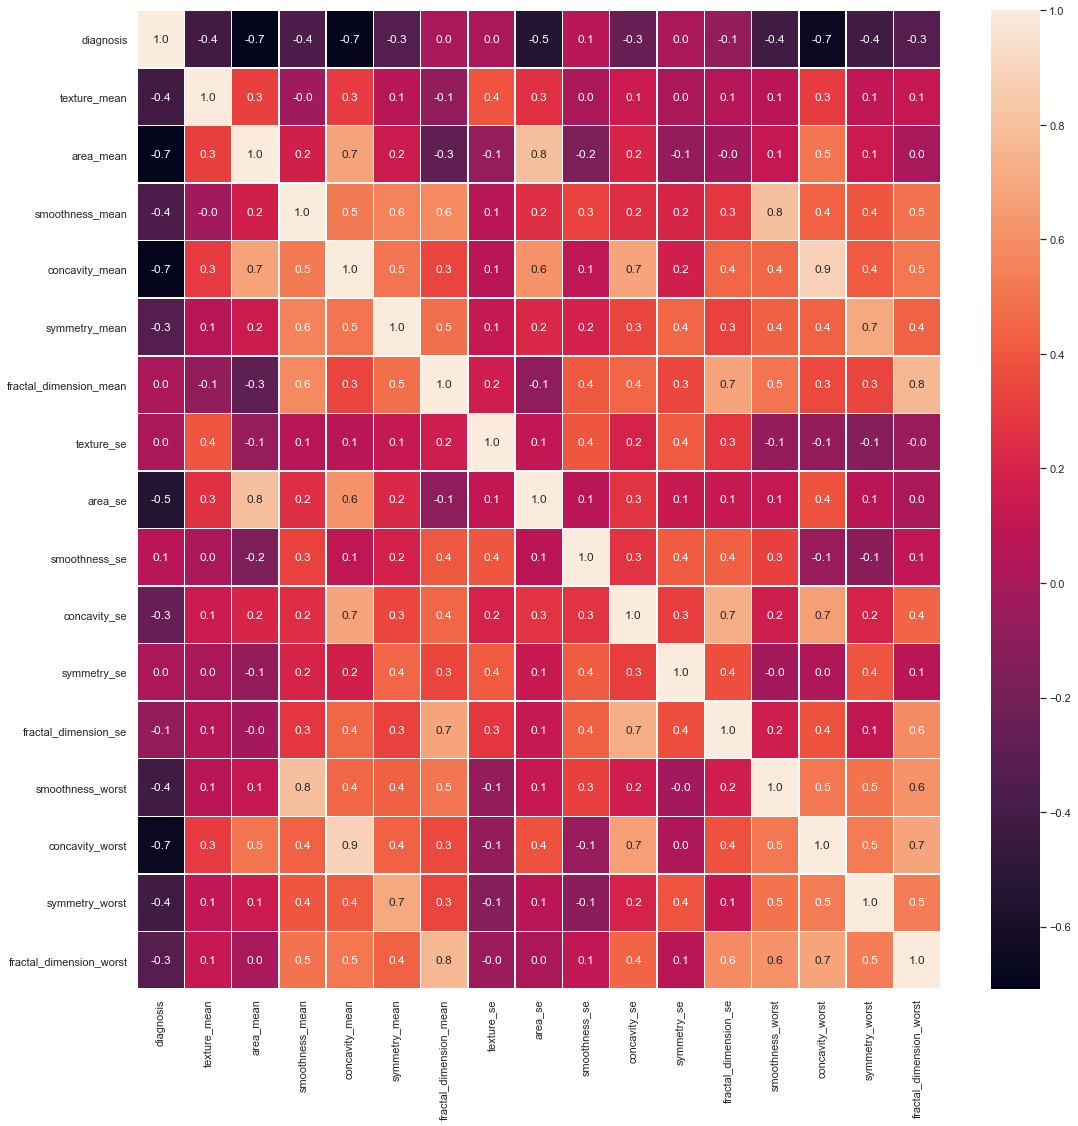

In [19]:
# correlation matrix on new data obtained aftr removing some variables

fig,ax = plt.subplots(figsize=(18,18))
sns.heatmap(data_cleaned.corr(),annot=True,linewidths=0.5,fmt='.1f',ax=ax)

### 3.8 Feature selection

In [20]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

x = data_cleaned.drop(['diagnosis'],axis=1)
y = data_cleaned['diagnosis']

select_feature = SelectKBest(chi2,k=5).fit(x,y)

X = select_feature.transform(x)
X # selected features are 'texture_mean','area mean','concavity_mean','area_se','concavity_worst'

array([[1.038e+01, 1.001e+03, 3.001e-01, 1.534e+02, 7.119e-01],
       [1.777e+01, 1.326e+03, 8.690e-02, 7.408e+01, 2.416e-01],
       [2.125e+01, 1.203e+03, 1.974e-01, 9.403e+01, 4.504e-01],
       ...,
       [2.808e+01, 8.581e+02, 9.251e-02, 4.855e+01, 3.403e-01],
       [2.933e+01, 1.265e+03, 3.514e-01, 8.622e+01, 9.387e-01],
       [2.454e+01, 1.810e+02, 0.000e+00, 1.915e+01, 0.000e+00]])

## Bagging classifier

**1. Splitting data**

In [21]:
#A Bagging classifier is an ensemble meta-estimator that fits base classifiers each on random subsets
#of the original dataset and then aggregate their individual predictions (either by voting or by
#averaging) to form a final prediction.Such a meta-estimator can typically be used as a way to reduce
#the variance of a black-box estimator (e.g., a decision tree), by introducing randomization into its
#construction procedure and then making an ensemble out of it.


#Bootstrap aggregating, also called bagging (from bootstrap aggregating), is a machine learning ensemble 
#meta-algorithm designed to improve the stability and accuracy of machine learning algorithms used in statistical 
#classification and regression. It also reduces variance and helps to avoid overfitting. Although it is usually
#applied to decision tree methods, it can be used with any type of method. Bagging is a special case of the model 
#averaging approach.

In [22]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=10)

print("X_train",X_train.shape)
print("y_train",y_train.shape)
print("X_test",X_test.shape)
print("y_test",y_test.shape)

X_train (398, 5)
y_train (398,)
X_test (171, 5)
y_test (171,)


**Classifier**

In [23]:
from sklearn.ensemble import BaggingClassifier
from sklearn import tree

meta_estimator = BaggingClassifier(tree.DecisionTreeClassifier(random_state=10))

meta_estimator.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=10))

**Prediction**

In [24]:
y_pred = meta_estimator.predict(X_test)

**Compute accuracy**

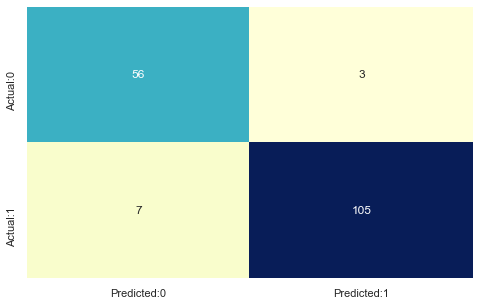

In [25]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,y_pred)

conf_matrix = pd.DataFrame(data =cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])

plt.figure(figsize=(8,5))

sns.heatmap(conf_matrix,annot=True,fmt='d',cmap="YlGnBu",cbar=False)

# plot a heatmap
# cmap: colour code used for plotting
# annot: prints the correlation values in the chart
# annot_kws: sets the font size of the annotation
# cbar=False: Whether to draw a colorbar
# fmt: string formatting code to use when adding annotations

plt.show()

##### 164 correct prediction out of 171 (96% accuracy)

In [26]:
# True Negatives are denoted by 'TN'
# Actual 'O' values which are classified correctly
TN = cm[0,0]

# True Positives are denoted by 'TP'
# Actual '1' values which are classified correctly
TP = cm[1,1]

# False Negatives are denoted by 'FN'
# Actual '1' values which are classified wrongly as '0'
FN = cm[1,0]

# False Positives are denoted by 'FP'
# Actual 'O' values which are classified wrongly as '1'
FP = cm[0,1]


In [27]:
from sklearn.metrics import classification_report

result = classification_report(y_test,y_pred)
print(result)

              precision    recall  f1-score   support

           0       0.89      0.95      0.92        59
           1       0.97      0.94      0.95       112

    accuracy                           0.94       171
   macro avg       0.93      0.94      0.94       171
weighted avg       0.94      0.94      0.94       171



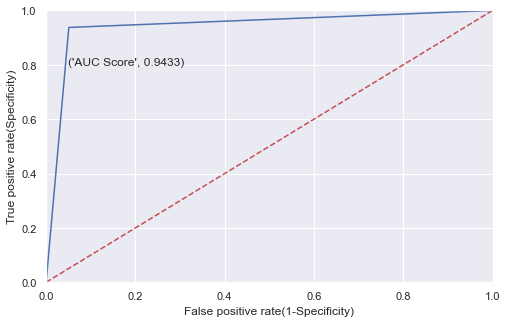

In [28]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

plt.rcParams['figure.figsize']=(8,5)

fpr,tpr,th = roc_curve(y_test,y_pred)
# plor ROC curve
plt.plot(fpr,tpr)

plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])

plt.plot([0,1],[0,1],'r--')  # r-- : Red dashed line

#AUC or AUROC is area under ROC curve. The value of AUC tells us the model performance. Higher the AUC 
# better the model performance
#to add AOC score
plt.text(x=0.05,y=0.8,s=('AUC Score',round(roc_auc_score(y_test,y_pred),4)))

plt.xlabel('False positive rate(1-Specificity)')
plt.ylabel('True positive rate(Specificity)')

plt.grid(True)

#### The dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left corner)

#### We see our classifier is away from the dotted line; which means the meta-estimator model is a good classifier


**5.Tabulate data**

In [29]:
from sklearn import metrics

cols = ['Model','AUC Score','Precision Score','Recall Score','Accuracy Score','f1-score']

#creating empty dataframe
result_tabulation = pd.DataFrame(columns=cols)

#Compiling the rew info
Bagging_Meta_estimator = pd.Series({
                                    'Model':"Bagging Meta_estimator",
                                    'AUC Score':metrics.roc_auc_score(y_test,y_pred),
                                    'Precision Score':metrics.precision_score(y_test,y_pred),
                                    'Recall Score':metrics.recall_score(y_test,y_pred),
                                    'Accuracy Score':metrics.accuracy_score(y_test,y_pred),
                                    'f1-score':metrics.f1_score(y_test,y_pred)
                                   })

#appending results
result_tabulation = result_tabulation.append(Bagging_Meta_estimator,ignore_index=True)

#view
result_tabulation

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,f1-score
0,Bagging Meta_estimator,0.943326,0.972222,0.9375,0.94152,0.954545


## AdaBoost

In [30]:
#AdaBoost algorithm, short for Adaptive Boosting, is a Boosting technique used as an Ensemble Method
#in Machine Learning. It is called Adaptive Boosting as the weights are re-assigned to each instance,
#with higher weights assigned to incorrectly classified instances.
#What this algorithm does is that it builds a model and gives equal weights to all the data points.
#It then assigns higher weights to points that are wrongly classified. Now all the points which have
#higher weights are given more importance in the next model. It will keep training models until and
#unless a lower error is received.


In [31]:
from sklearn.ensemble import AdaBoostClassifier

adaboost = AdaBoostClassifier(random_state=10)
adaboost.fit(X_train,y_train)

AdaBoostClassifier(random_state=10)

**2. Do predictions on test set**

In [32]:
y_pred_adaboost = adaboost.predict(X_test)

**3. Confusion matrix**

<AxesSubplot:>

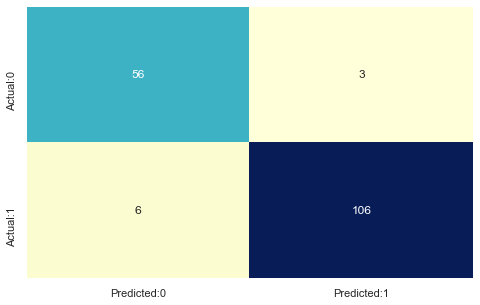

In [33]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,y_pred_adaboost)

conf_matrix = pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])

plt.figure(figsize=(8,5))

sns.heatmap(conf_matrix,annot=True,fmt='d',cmap="YlGnBu",cbar=False)

In [34]:
# True Negatives are denoted by 'TN'
# Actual 'O' values which are classified correctly
TN = cm[0,0]

# True Positives are denoted by 'TP'
# Actual '1' values which are classified correctly
TP = cm[1,1]

# False Negatives are denoted by 'FN'
# Actual '1' values which are classified wrongly as '0'
FN = cm[1,0]

# False Positives are denoted by 'FP'
# Actual 'O' values which are classified wrongly as '1'
FP = cm[0,1]


In [35]:
from sklearn.metrics import classification_report

result = classification_report(y_test,y_pred_adaboost)
print(result)

              precision    recall  f1-score   support

           0       0.90      0.95      0.93        59
           1       0.97      0.95      0.96       112

    accuracy                           0.95       171
   macro avg       0.94      0.95      0.94       171
weighted avg       0.95      0.95      0.95       171



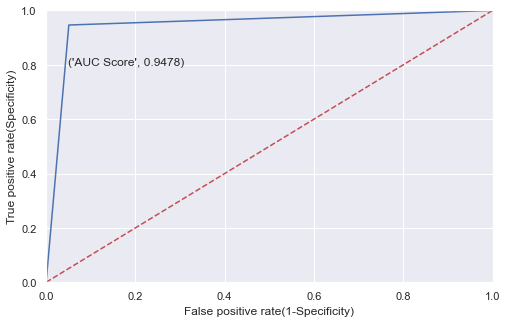

In [36]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

plt.rcParams['figure.figsize']=(8,5)

fpr,tpr,th = roc_curve(y_test,y_pred_adaboost)
# plor ROC curve
plt.plot(fpr,tpr)

plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])

plt.plot([0,1],[0,1],'r--')  # r-- : Red dashed line

#AUC or AUROC is area under ROC curve. The value of AUC tells us the model performance. Higher the AUC 
# better the model performance
#to add AOC score
plt.text(x=0.05,y=0.8,s=('AUC Score',round(roc_auc_score(y_test,y_pred_adaboost),4)))

plt.xlabel('False positive rate(1-Specificity)')
plt.ylabel('True positive rate(Specificity)')

plt.grid(True)

In [37]:
adaboost_metrics = pd.Series({
                                    'Model':"AdaBoost",
                                    'AUC Score':metrics.roc_auc_score(y_test,y_pred_adaboost),
                                    'Precision Score':metrics.precision_score(y_test,y_pred_adaboost),
                                    'Recall Score':metrics.recall_score(y_test,y_pred_adaboost),
                                    'Accuracy Score':metrics.accuracy_score(y_test,y_pred_adaboost),
                                    'f1-score':metrics.f1_score(y_test,y_pred_adaboost)
                                   })

#appending results
result_tabulation = result_tabulation.append(adaboost_metrics,ignore_index=True)

#view
result_tabulation

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,f1-score
0,Bagging Meta_estimator,0.943326,0.972222,0.937500,0.941520,0.954545
1,AdaBoost,0.947791,0.972477,0.946429,0.947368,0.959276


## XGBM - Extreme Gradient Boosting Model

In [38]:
#A Gradient Boosting Machine or GBM combines the predictions from multiple decision trees to generate
#the final predictions. ... So, every successive decision tree is built on the errors of the previous
#trees. This is how the trees in a gradient boosting machine algorithm are built sequentially.
#Gradient boosting is a generalization of AdaBoosting, improving the performance of the approach and
#introducing ideas from bootstrap aggregation to further improve the models, such as randomly sampling
#the samples and features when fitting ensemble members.


In [39]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [40]:
from xgboost.sklearn import XGBClassifier

xgbm = XGBClassifier(random_state=1,learning_rate=0.01)

xgbm.fit(X_train,y_train)

C:\Users\Tarun\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:45:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.01, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [41]:
y_pred_xgbm = xgbm.predict(X_test)

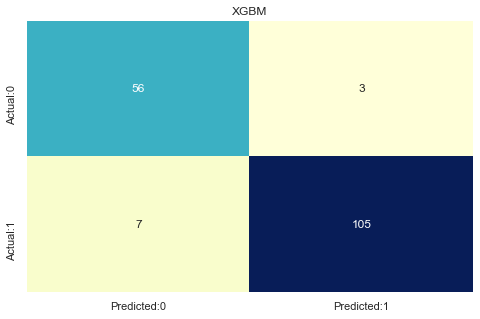

In [42]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,y_pred_xgbm)

conf_matrix = pd.DataFrame(data =cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])

plt.figure(figsize=(8,5))
plt.title("XGBM")
sns.heatmap(conf_matrix,annot=True,fmt='d',cmap="YlGnBu",cbar=False)

# plot a heatmap
# cmap: colour code used for plotting
# annot: prints the correlation values in the chart
# annot_kws: sets the font size of the annotation
# cbar=False: Whether to draw a colorbar
# fmt: string formatting code to use when adding annotations

plt.show()

In [43]:
# True Negatives are denoted by 'TN'
# Actual 'O' values which are classified correctly
TN = cm[0,0]

# True Positives are denoted by 'TP'
# Actual '1' values which are classified correctly
TP = cm[1,1]

# False Negatives are denoted by 'FN'
# Actual '1' values which are classified wrongly as '0'
FN = cm[1,0]

# False Positives are denoted by 'FP'
# Actual 'O' values which are classified wrongly as '1'
FP = cm[0,1]

In [44]:
from sklearn.metrics import classification_report

result = classification_report(y_test,y_pred_xgbm)
print(result)

              precision    recall  f1-score   support

           0       0.89      0.95      0.92        59
           1       0.97      0.94      0.95       112

    accuracy                           0.94       171
   macro avg       0.93      0.94      0.94       171
weighted avg       0.94      0.94      0.94       171



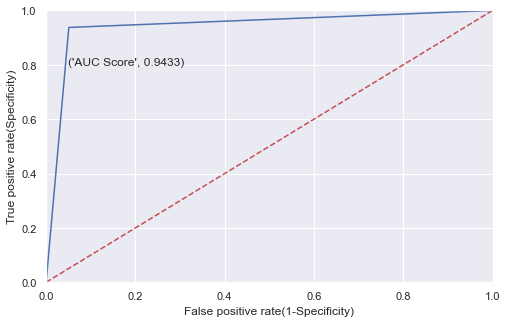

In [45]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

plt.rcParams['figure.figsize']=(8,5)

fpr,tpr,th = roc_curve(y_test,y_pred_xgbm)
# plor ROC curve
plt.plot(fpr,tpr)

plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])

plt.plot([0,1],[0,1],'r--')  # r-- : Red dashed line

#AUC or AUROC is area under ROC curve. The value of AUC tells us the model performance. Higher the AUC 
# better the model performance
#to add AOC score
plt.text(x=0.05,y=0.8,s=('AUC Score',round(roc_auc_score(y_test,y_pred_xgbm),4)))

plt.xlabel('False positive rate(1-Specificity)')
plt.ylabel('True positive rate(Specificity)')

plt.grid(True)

In [46]:
xgbm_metrics = pd.Series({
                                    'Model':"XGBM",
                                    'AUC Score':metrics.roc_auc_score(y_test,y_pred_xgbm),
                                    'Precision Score':metrics.precision_score(y_test,y_pred_xgbm),
                                    'Recall Score':metrics.recall_score(y_test,y_pred_xgbm),
                                    'Accuracy Score':metrics.accuracy_score(y_test,y_pred_xgbm),
                                    'f1-score':metrics.f1_score(y_test,y_pred_xgbm)
                                   })

#appending results
result_tabulation = result_tabulation.append(xgbm_metrics,ignore_index=True)

#view
result_tabulation

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,f1-score
0,Bagging Meta_estimator,0.943326,0.972222,0.937500,0.941520,0.954545
1,AdaBoost,0.947791,0.972477,0.946429,0.947368,0.959276
2,XGBM,0.943326,0.972222,0.937500,0.941520,0.954545


# Result

In [47]:
result_tabulation

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,f1-score
0,Bagging Meta_estimator,0.943326,0.972222,0.937500,0.941520,0.954545
1,AdaBoost,0.947791,0.972477,0.946429,0.947368,0.959276
2,XGBM,0.943326,0.972222,0.937500,0.941520,0.954545


**It can be seen from the result tabulation, that accuracy measures for the AdaBoost is better than the other models**